# OIP 2021   Week 48 
## Exercise 1
### The Particle-Swarm Optimisation (PSO) algorithm

In [1]:
import numpy as np
import csv
import numpy.linalg as la
import scipy.optimize as sopt
from mpl_toolkits.mplot3d import axes3d
import random as ran
import matplotlib
import matplotlib.pyplot as plt

# for non-standard color maps
import matplotlib.cm as cm
#for defining functions
# sympy imports for calculation and nice display: 
from sympy.interactive.printing import init_printing
from sympy.matrices import *
from sympy.plotting import plot3d
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)

from mpl_toolkits.mplot3d import axes3d
# Some house holding: 
%config InlineBackend.figure_format = 'retina' # (doubles the plot dpi)
%matplotlib notebook 

# sympy imports for calculation and nice display: 
from sympy.interactive.printing import init_printing
from sympy.matrices import *
from sympy.plotting import plot3d
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)

- The Particle-Swarm Optimisation (PSO) algorithm is based on having a set amount of particles spread out in the n-dimensional parameter space of the function to be optimized, each particle representing a solution to the problem
- The particles should be initialized in positions following a uniform distribution across the n dimensions, which means that they should be spread uniformly (but still inherently random) in the parameter space.
- The idea is that the particles move around in the parameters space with a velocity and this velocity is updated each iteration of the PSO-algorithm according to three therms.
- The first term is the inertia of the particle and is in the simplest case the current velocity.
- The next term is the cognitive component and represents the particles ability to "remember" it's own previous best value and it being drawn towards this point.
- The last component, the social component, which represents the particles tendency to go towards the current globally best position.

First let us define our Ackley function..

In [2]:
def Function(pos):
    '''The Ackley Function (2D-implementation)
    
    The 2D input vector needs to be of the form: 
    np.array([[-2., 2., 2.],[2., 3., -2.]])
    '''
    x = pos[0]
    y = pos[1]
    a = 20
    b = 0.2
    c = 2 * np.pi
    sum_sq_term = -a * np.exp(-b * np.sqrt(x*x + y*y) / 2)
    cos_term = -np.exp((np.cos(c*x) + np.cos(c*y)) / 2)
    Z = -(a + np.exp(1) + sum_sq_term + cos_term) 
    return Z

PSO Algorithm implementation... 

In [3]:
def update_velocity_testfunction(p_best,g_best,pos):
    #v = list(np.zeros((50,2)))
    v = ([np.array([0, 0]) for _ in range(n)])
    nv = []
    for i in range(n):
        nv.append((om*v[i]) + (c1*ran.random()) * (p_best[i] - pos[i]) + (c2*ran.random()) * (g_best-pos[i]))
        #Thresholding the Velocity
        #Thresholding along x-axis
        if (nv[i][0]>vmx):
            nv[i][0] = vmx
        elif (nv[i][0]<-vmx):
            nv[i][0] = -vmx

        #Thresholding along y-axis
        if (nv[i][1]>vmy):
            nv[i][1] = vmy
        elif (nv[i][1]<-vmy):
            nv[i][1] = -vmy
    return nv

In [4]:
def update_position_testfunction(v,pos):
    new_pos=[]
    for i in range(n):
        new_pos.append(pos[i]+v[i])
    return new_pos

In [5]:
def update_personal_best_testfunction(p_best,Par_Val,pos):
    for i in range(len(pos)):
        if ( Par_Val[i] >= Function(p_best[i]) ):
            p_best[i] = pos[i]
    return p_best


In [6]:
def update_global_best_testfunction(g_best,Par_Val,pos):
    for i in range(n):
        if ( Par_Val[i] >= Function(g_best) ):
            g_best = pos[i]
    return g_best

In [7]:
def PSO_testfunction(n,ns,c1,c2,om,k,t,xmin,xmax,ymin,ymax):
    

    #Step 1a, 
    #Initializing the Position
    #pos = []
    #for i in range(n):
        #pos.append([ran.randrange(xmin,xmax), ran.randrange(ymin,ymax)])
    pos = np.array([np.array([ran.randrange(xmin,xmax), ran.randrange(ymin,ymax)]) for i in range(n)])
    
    #Step 1b,
    #Initializing the Particles best position as the initial assumptions
    p_best = pos

    #Step 1c
    #Calulating fitness of each particle
    Par_Val = []
    for i in range(n-1):
        Par_Val.append(Function(pos[i])) 

    #Finding the maximum value and then the points that give this maximum value and then setting these points as the new global best

    #indices = [i for i, x in enumerate(Par) if x == max(Par)] #Finds the max value, 
    #returns the indices of the best position that gives this value
    global_best_pos_index = (Par_Val.index(max(Par_Val)))

    #sets the global best position 
    g_best = pos[global_best_pos_index]

    #Step 2
    #Iterating Until Stopping Criterion is met
    Iter=0
    particles=[pos]
    while (Iter <= ns):
        #step 2a
        #Update Particle Velocity
        v = update_velocity_testfunction(p_best,g_best,pos)
        #Step 2b
        #Update Particle Position
        pos = update_position_testfunction(v,pos)
        #step 2c
        #Evaluate fitness
        for i in range(n):
            Par_Val.insert(i, Function(pos[i]))
        
        #Step 2d
        #Updating the personal best
        #if
        p_best = update_personal_best_testfunction(p_best,Par_Val,pos)
        #particles.append(p_best)
        #Step 2e
        #Updating the global best
        #if
        g_best = update_global_best_testfunction(g_best, Par_Val,pos)
        g_best_value = Function(g_best)
        print("The best position is: ", g_best," Value: ",g_best_value, " in iteration number ", Iter)
        Iter = Iter+1
            
    return g_best, g_best_value, p_best

In [8]:
n = 50; # number of particles
ns = 15; #number of iterations
c1 = 2; # cognitive coefficient
c2 = 2; #social coefficient
om = 0.9; # inertia weight
k = 1; #velocity restricting constant
t = 0.2; #animation speed/delay after each iteration

#search range the Ackley function. to test the ackley function
xmin = -10
xmax = 10
ymin = -10
ymax = 10

 #maximum velocity
vmx = k*(xmax-xmin)/2
vmy = k*(ymax-ymin)/2

#For our problem xmin/xmax and ymin/ymax should be gotten from the data however for the testing function it could be arbitrary (32)
best_point, best_value,particles = PSO_testfunction(n,ns,c1,c2,om,k,t,xmin,xmax,ymin,ymax)
print(best_point)

The best position is:  [ 0.16823888 -0.22117408]  Value:  -1.8673839407953614  in iteration number  0
The best position is:  [ 0.06143672 -0.08076736]  Value:  -0.4601301540817708  in iteration number  1
The best position is:  [ 0.01539457 -0.02023836]  Value:  -0.06806336616416697  in iteration number  2
The best position is:  [-0.00085535  0.00112447]  Value:  -0.002878990558566663  in iteration number  3
The best position is:  [ 0.00078519 -0.00103224]  Value:  -0.0026388215716579566  in iteration number  4
The best position is:  [-0.00044693  0.00058756]  Value:  -0.0014910096516680404  in iteration number  5
The best position is:  [-0.00027578  0.00036255]  Value:  -0.0009165717519019623  in iteration number  6
The best position is:  [-0.00019266 -0.00022549]  Value:  -0.000595523944856069  in iteration number  7
The best position is:  [-4.53697315e-05 -5.31001789e-05]  Value:  -0.00013981633739668098  in iteration number  8
The best position is:  [4.68335885e-06 5.48134592e-06]  

In [9]:
def next_particle_set(particles):
    x= []
    y = []
    z = []
    for p in range(len(particles)):
        x.append(particles[p][0].tolist())
        y.append(particles[p][1].tolist())
        z.append(Function(particles[p]))
    return [x, y, z]
def func_MG(x_vec, y_vec, Function):
    '''Convert the 2D-FUNCTION TO THE MESHGRID 
    (might be possible in an easier way)'''
    F = np.zeros((x_vec.shape[0],y_vec.shape[0]))
    for cntx in range(x_vec.shape[0]):
        for cnty in range(y_vec.shape[0]):
            F[cntx,cnty] = Function([x_vec[cntx], y_vec[cnty]])        
    return(F)  

In [10]:
# Setup work
x_vec = np.arange(-10.,10.,0.1)
y_vec = x_vec

# Convert function to Meshgrid - for plotting purposes: 
F = func_MG(x_vec,y_vec, Function);
X, Y = np.meshgrid(x_vec,y_vec)

In [11]:
best_point, best_value,particles = PSO_testfunction(n,5,c1,c2,om,k,t,xmin,xmax,ymin,ymax)
#print(next_particle_set(particles))
#print(particles[1])

The best position is:  [-1.  2.]  Value:  -4.007410226459292  in iteration number  0
The best position is:  [0.21625872 0.15223171]  Value:  -1.7582686683524014  in iteration number  1
The best position is:  [-0.05722445 -0.04028219]  Value:  -0.26661527979906374  in iteration number  2
The best position is:  [0.02765019 0.01946389]  Value:  -0.09795247759785575  in iteration number  3
The best position is:  [-0.01131719 -0.00796655]  Value:  -0.03279296675242804  in iteration number  4
The best position is:  [-0.0005919  -0.00041666]  Value:  -0.0014616934235784917  in iteration number  5


The best position is:  [-0.04486734  0.        ]  Value:  -0.1426585656475603  in iteration number  0
The best position is:  [-0.01248747  0.        ]  Value:  -0.02913753576202316  in iteration number  1
The best position is:  [-0.02092984 -1.9738377 ]  Value:  -3.6125629433306594  in iteration number  0
The best position is:  [-0.02007972 -1.97490035]  Value:  -3.611930218891095  in iteration number  1
The best position is:  [-0.01631128 -0.26535639]  Value:  -1.6759204077208651  in iteration number  2
The best position is:  [0.00231768 0.0377047 ]  Value:  -0.1132498163204616  in iteration number  3
The best position is:  [-0.00011942 -0.00194278]  Value:  -0.0039941631490245655  in iteration number  4
The best position is:  [0.0001042  0.00169516]  Value:  -0.0034738097517239552  in iteration number  5
The best position is:  [0.9247155  0.15056899]  Value:  -2.41618171530183  in iteration number  0
The best position is:  [-1.89503310e-04 -3.08563253e-05]  Value:  -0.000384983310620

C:\Users\Andri\AppData\Local\Temp/ipykernel_6668/2714744813.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


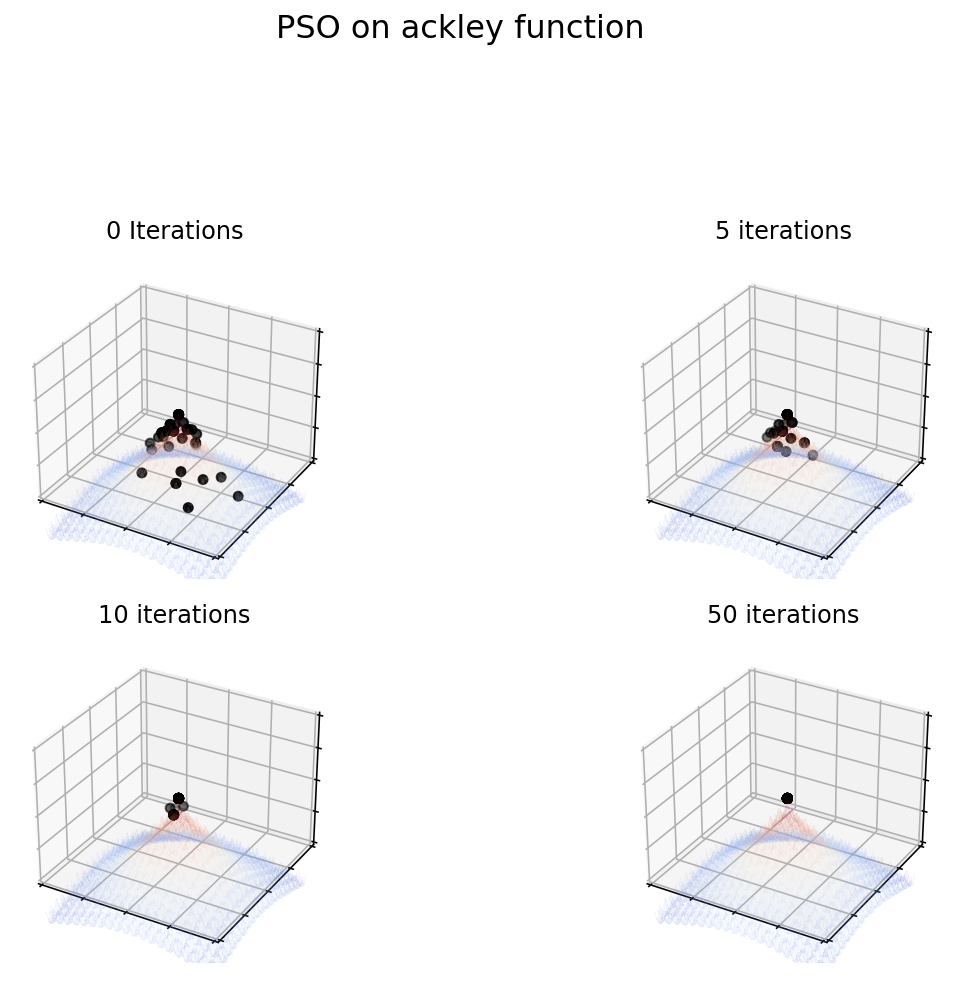

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
axs = []

for i in range(4):
    axs.append(fig.add_subplot(3, 2, i + 1, projection='3d'))
    axs[i].plot_surface(X, Y, F.transpose(), alpha=0.05, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)
    #axs[i].set_xlabel('x')
    #axs[i].set_ylabel('y')
    #axs[i].set_zlabel('f(x,y)')
    axs[i].set_yticklabels([])
    axs[i].set_xticklabels([])
    axs[i].set_zticklabels([])
    axs[i].set_xlim(-10, 10)
    axs[i].set_ylim(-10, 10)
    axs[i].set_zlim(-10, 10)
    #axs[i].auto_scale_xyz([0, 500], [0, 500], [0, 0.15])

fig.suptitle('PSO on ackley function', size=16, y=1.05)
best_point, best_value,particles = PSO_testfunction(n,1,c1,c2,om,k,t,xmin,xmax,ymin,ymax)    
#Plot initial position of particles
axs[0].set_title('0 Iterations', pad=10)
axs[0].scatter(*next_particle_set(particles), color='black');

# #Go through the next 50 iterations
# for i in range(5):
#     next(PSO_testfunction(n,ns,c1,c2,om,k,t,xmin,xmax,ymin,ymax))
best_point, best_value,particles = PSO_testfunction(n,5,c1,c2,om,k,t,xmin,xmax,ymin,ymax)
# #Plot particle positions after 50 iterations
axs[1].set_title('5 iterations', pad=10)
axs[1].scatter(*next_particle_set(particles), color='black');

#Go through the next 50 iterations
# for i in range(5):
#     next(PSO_testfunction(n,ns,c1,c2,om,k,t,xmin,xmax,ymin,ymax))
best_point, best_value,particles = PSO_testfunction(n,10,c1,c2,om,k,t,xmin,xmax,ymin,ymax)
#Plot particle positions after 50 iterations
axs[2].set_title('10 iterations', pad=10)
axs[2].scatter(*next_particle_set(particles), color='black');

#Go through the next 50 iterations
# for i in range(5):
#     next(PSO_testfunction(n,ns,c1,c2,om,k,t,xmin,xmax,ymin,ymax))
best_point, best_value,particles = PSO_testfunction(n,50,c1,c2,om,k,t,xmin,xmax,ymin,ymax)
#Plot particle positions after 50 iterations
axs[3].set_title('50 iterations', pad=10)
axs[3].scatter(*next_particle_set(particles), color='black');

plt.tight_layout()

## Exercise 2
### Model fitting

The goal is to fit the function $f(x,y)=(a-x)^2+b(y-x^2)^2$ using RMS error method.

In [23]:
#Load the data from the textfile assumed to be in the same folder as the notebook
#data = np.loadtxt("Experimental_Data_xy.txt", delimiter =',')

data = np.ndarray([[45.625, 24.5, 12.802077293395996], [30.0, 34.5, 12.619529724121094], [16.68181800842285, 36.681819915771484, 4.0478515625], [52.5, 49.5, 3.5356338024139404], [23.0, 51.0, 5.099119663238525], [38.0, 57.0, 4.123205661773682]])


#Define the function
def f2(a, b, y, x): 
        return (a- x)**2 + b*(y - x**2)**2
print(data[0])

TypeError: 'list' object cannot be interpreted as an integer

Lets see how the data and function look like...

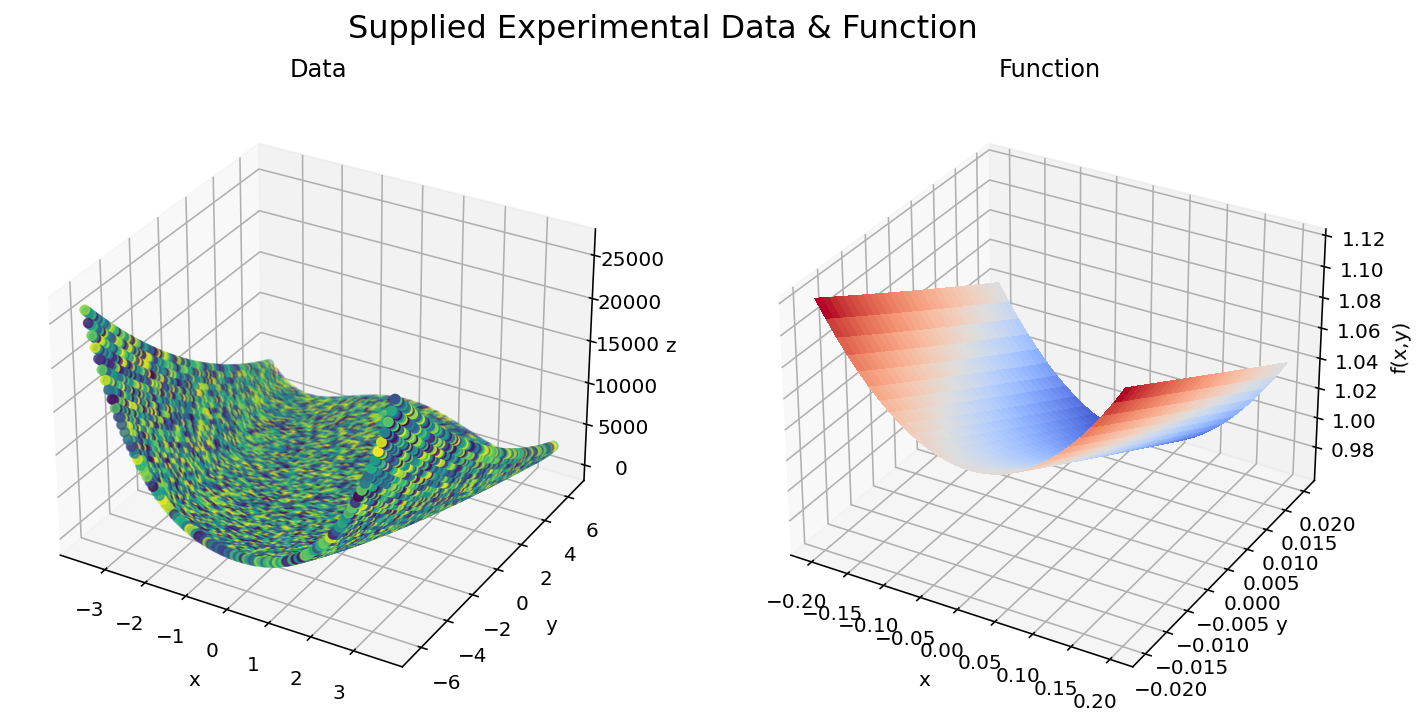

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Supplied Experimental Data & Function', size=16, y=0.95)
ax1 = fig.add_subplot(121,projection = '3d')
ax1.scatter(*data.T, marker= 'o', c=np.random.rand(len(data)))
    
ax1.set_xlabel('x');
ax1.set_ylabel('y');
ax1.set_zlabel('z');
ax1.set_title('Data', pad=10)

x = np.linspace(-0.20, 0.20, 30)
y = np.linspace(-0.020, 0.020, 30)
X, Y = np.meshgrid(x, y)
Z = f2(1, 2, X, Y)

ax2 = fig.add_subplot(122,projection = '3d')
ax2.plot_surface(X, Y, Z, alpha=1, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False);
ax2.set_xlabel('x');
ax2.set_ylabel('y');
ax2.set_zlabel('f(x,y)');
ax2.set_title('Function', pad=10);

RMS error..

In [16]:
def calc_error(args):
    '''args is the parameter space arguments as a list. In this case a and b.'''
    #Initially there is no error
    e_2 = 0
    
    for p in data:
        #Calculate the function value for the (x,y) of the point and subtract the z value from this and then square this and add to the total error.
        e_2 += (f2(args[0], args[1], p[0], p[1]) - p[2])**2
    
    #Return the total error
    return e_2

In [17]:
xmin = -3
xmax = 3
ymin = -6
ymax = 6

 #maximum velocity
vmx = k*(xmax-xmin)/2
vmy = k*(ymax-ymin)/2


In [18]:
def update_personal_best_testfunction(p_best,Par_Val,pos):
    for i in range(len(pos)):
        if ( Par_Val[i] <=Function(p_best[i]) ):
            p_best[i] = pos[i]
    return p_best

def update_global_best_testfunction(g_best,Par_Val,pos):
    for i in range(n):
        if ( Par_Val[i]<= Function(g_best) ):
            g_best = pos[i]
    return g_best

def PSO_testfunction(n,ns,c1,c2,om,k,t,xmin,xmax,ymin,ymax):
    

    #Step 1a, 
    #Initializing the Position
    #pos = []
    #for i in range(n):
        #pos.append([ran.randrange(xmin,xmax), ran.randrange(ymin,ymax)])
    pos = np.array([np.array([ran.randrange(xmin,xmax), ran.randrange(ymin,ymax)]) for _ in range(n)])

    #Step 1b,
    #Initializing the Particles best position as the initial assumptions
    p_best = pos

    #Step 1c
    #Calulating fitness of each particle
    Par_Val = []
    for i in range(n-1):
        Par_Val.append(calc_error(pos[i])) 

    #Finding the maximum value and then the points that give this maximum value and then setting these points as the new global best

    #indices = [i for i, x in enumerate(Par) if x == max(Par)] #Finds the max value, returns the indices of the best position that gives this value
    global_best_pos_index = (Par_Val.index(min(Par_Val)))

    #sets the global best position 
    g_best = pos[global_best_pos_index]

    #Step 2
    #Iterating Until Stopping Criterion is met
    Iter=0
    particles=[pos]
    while (Iter <= ns):
        #step 2a
        #Update Particle Velocity
        v = update_velocity_testfunction(p_best,g_best,pos)
        #Step 2b
        #Update Particle Position
        pos = update_position_testfunction(v,pos)
        #step 2c
        #Evaluate fitness
        for i in range(n):
            Par_Val.insert(i, calc_error(pos[i]))
        
        #Step 2d
        #Updating the personal best
        #if
        p_best = update_personal_best_testfunction(p_best,Par_Val,pos)
        particles.append(p_best)
        #Step 2e
        #Updating the global best
        #if
        g_best = update_global_best_testfunction(g_best, Par_Val,pos)
        g_best_value = calc_error(g_best)
        print("The best position is: ", g_best," Value: ",g_best_value, " in iteration number ", Iter)
        Iter = Iter+1
            
    return g_best, g_best_value, p_best

In [19]:
best_point, best_value,particles = PSO_testfunction(n,50,c1,c2,om,k,t,xmin,xmax,ymin,ymax)

The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  0
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  1
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  2
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  3
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  4
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  5
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  6
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  7
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  8
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  9
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  10
The best position is:  [2 4]  Value:  247400206832.47174  in iteration number  11
The best position is:  [2 

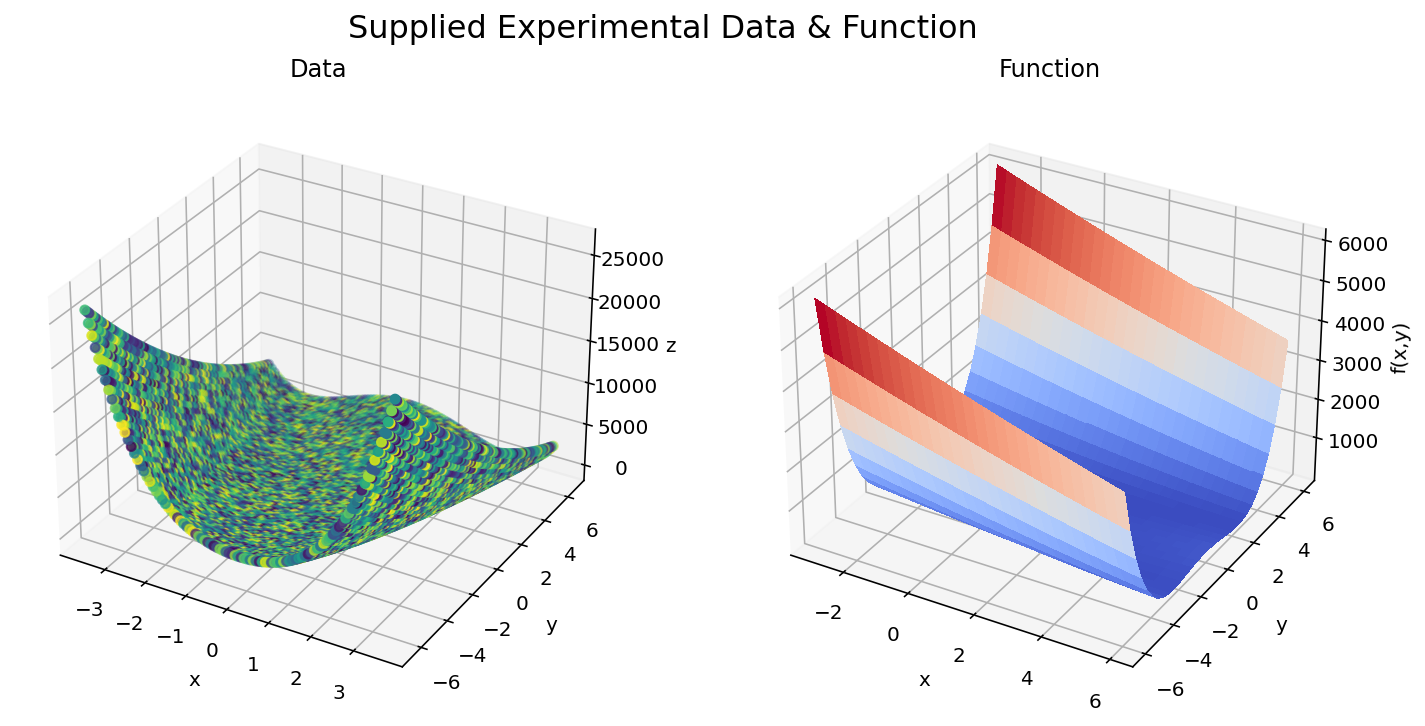

In [20]:
%matplotlib inline
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Supplied Experimental Data & Function', size=16, y=0.95)
ax1 = fig.add_subplot(121,projection = '3d')
ax1.scatter(*data.T, marker= 'o', c=np.random.rand(len(data)))
    
ax1.set_xlabel('x');
ax1.set_ylabel('y');
ax1.set_zlabel('z');
ax1.set_title('Data', pad=10)

x = np.linspace(-3, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f2(best_point[0],best_point[1], X, Y)

ax2 = fig.add_subplot(122,projection = '3d')
ax2.plot_surface(X, Y, Z, alpha=1, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False);
ax2.set_xlabel('x');
ax2.set_ylabel('y');
ax2.set_zlabel('f(x,y)');
ax2.set_title('Function', pad=10);



In [21]:
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from numpy.linalg import norm 
x=[1,2]
Resedual = minimize(calc_error, x, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
print(Resedual.x)

Optimization terminated successfully.
         Current function value: 182092714290.261169
         Iterations: 117
         Function evaluations: 257
[54.41588331  1.50990784]


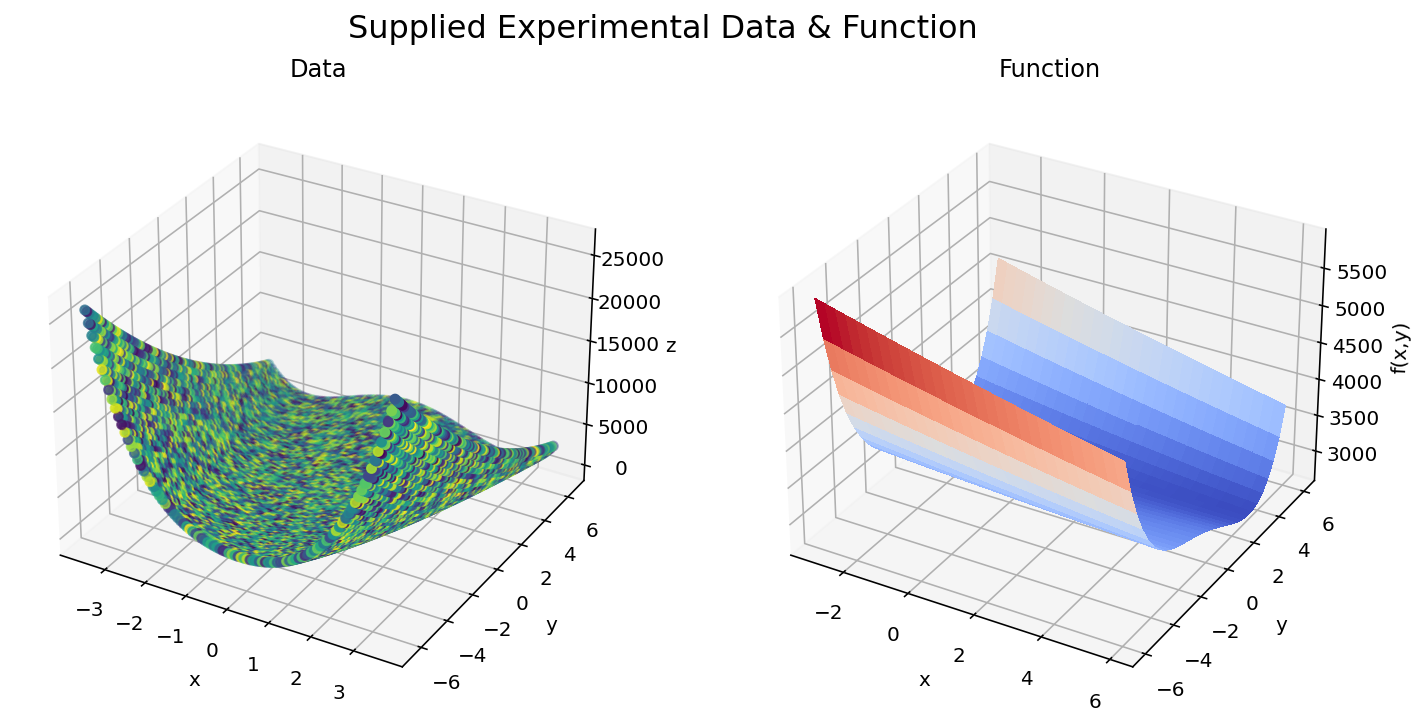

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Supplied Experimental Data & Function', size=16, y=0.95)
ax1 = fig.add_subplot(121,projection = '3d')
ax1.scatter(*data.T, marker= 'o', c=np.random.rand(len(data)))
    
ax1.set_xlabel('x');
ax1.set_ylabel('y');
ax1.set_zlabel('z');
ax1.set_title('Data', pad=10)

x = np.linspace(-3, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f2(Resedual.x[0],Resedual.x[1], X, Y)

ax2 = fig.add_subplot(122,projection = '3d')
ax2.plot_surface(X, Y, Z, alpha=1, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False);
ax2.set_xlabel('x');
ax2.set_ylabel('y');
ax2.set_zlabel('f(x,y)');
ax2.set_title('Function', pad=10);